In [90]:
import numpy as np
import matplotlib.pyplot as plt

showing values of x :  [0.68760945 0.60246784 0.35140311 0.48242433 0.90847754 0.02282222
 0.47699214 0.81247349 0.05949701 0.61782024 0.13236131 0.04652689
 0.05261632 0.19464166 0.65291293 0.50485892 0.37366519 0.48830228
 0.49719026 0.45257944]


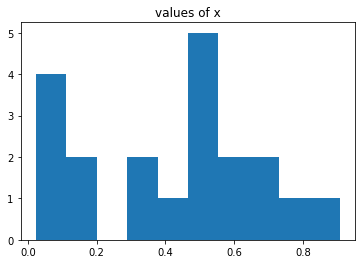

showing values of N :  [-1.03452051 -0.51860748 -0.37168649 -0.03915667 -0.06356929  0.55808854
 -0.41022983  1.63144502  0.41554421  0.3224582  -0.28515612 -2.87011257
  0.1933955  -0.98042991 -0.12202585 -0.25787897  0.76715645 -0.10671363
  0.3025628  -0.70213268]


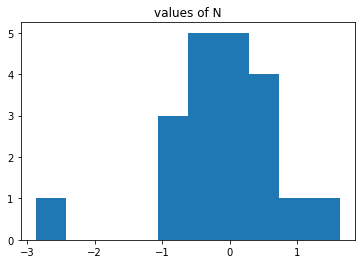

In [91]:
# rand = np.random.RandomState(20) 
x=np.random.uniform(0,1,20)
print('showing values of x : ',x)

plt.hist(x)
plt.title('values of x')
plt.show()

N=np.random.normal(size=20)
print('showing values of N : ',N)

plt.hist(N)
plt.title('values of N')
plt.show()


Values of y :  [1.7872971077613442, 1.6767793612901112, 1.0071878317009888, 1.4498310244181414, 2.464968118406061, 0.18331890892584807, 1.360474921161064, 2.6073509138498636, 0.2699381611675063, 1.8845256761337956, 0.35763475681706697, -0.4278877612815793, 0.20392331121170088, 0.41162385904468113, 1.8843685330262387, 1.4681592355847513, 1.3003560156171603, 1.4526551137023556, 1.5591141989476043, 1.2335283699205637]


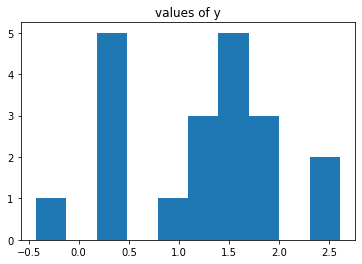

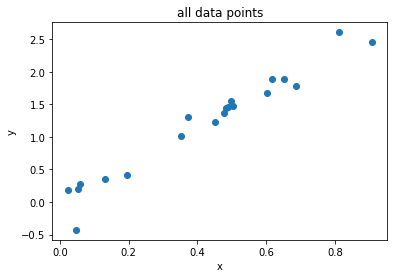

In [92]:
import math
y=[]
for i in range(20):
  # print(i)
  y.append((math.sin(x[i])*3.142)+(N[i]*0.2))
print('Values of y : ',y)

plt.hist(y)
plt.title('values of y')
plt.show()

plt.scatter(x,y)
plt.title('all data points')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [93]:
train_y=[]
test_y=[]
train_x=[]
test_x=[]
for i in range(20):
  if(i%2==0):
    train_y.append(y[i])
    train_x.append(x[i])
  else:
    test_y.append(y[i])
    test_x.append(x[i])

print("training set for y : ",train_y)
print("training set for x : ",train_x)
print("test set for y : ",test_y)
print("test set for x : ",test_x)

train_y=np.array(train_y)
test_y=np.array(test_y)
train_x=np.array(train_x)
test_x=np.array(test_x)

train_x=train_x.reshape(-1, 1)
train_y=train_y.reshape(-1, 1)
test_x=test_x.reshape(-1,1)
test_y=test_y.reshape(-1,1)


# plt.scatter(x,train_y)
# plt.title('Training data points')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

# plt.scatter(x,test_set)
# plt.title('Training data points')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()



training set for y :  [1.7872971077613442, 1.0071878317009888, 2.464968118406061, 1.360474921161064, 0.2699381611675063, 0.35763475681706697, 0.20392331121170088, 1.8843685330262387, 1.3003560156171603, 1.5591141989476043]
training set for x :  [0.6876094519927783, 0.35140310638194827, 0.9084775380762851, 0.47699213541837093, 0.059497005527378355, 0.13236131483247537, 0.05261632118419324, 0.6529129282163466, 0.37366518588208264, 0.49719026346897477]
test set for y :  [1.6767793612901112, 1.4498310244181414, 0.18331890892584807, 2.6073509138498636, 1.8845256761337956, -0.4278877612815793, 0.41162385904468113, 1.4681592355847513, 1.4526551137023556, 1.2335283699205637]
test set for x :  [0.602467840595958, 0.4824243302718335, 0.02282222317299698, 0.8124734885684151, 0.6178202357343192, 0.046526890444878455, 0.19464165747424556, 0.5048589230809657, 0.48830228010506405, 0.45257943581855764]


In [94]:
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [95]:
# train_x=np.array(train_x)
# train_y=np.array(train_y)
# train_x.reshape(-1)
# train_y.reshape(-1)
# polyreg=make_pipeline(PolynomialFeatures(9),LinearRegression())
# polyreg.fit(train_x,train_y)


# reference : https://moonbooks.org/Articles/How-to-implement-a-polynomial-linear-regression-using-scikit-learn-and-python-3-/
def Regression(i):
    polynomial_features = PolynomialFeatures(degree = i)
    x_transf=polynomial_features.fit_transform(train_x)
    
    model=LinearRegression()
    model.fit(x_transf,train_y)

    y_new=model.predict(x_transf)

    #training error
    rmse=np.sqrt(mean_squared_error(train_y,y_new))
    #test error
    rmse2=np.sqrt(mean_squared_error(test_y,y_new))
    
    r2=r2_score(test_y,y_new)
    
    print('RMSE of degree ',i,': ',rmse2)
    print('R2 of degree ',i,': ',r2)

    return polynomial_features, model





In [96]:
polynomial0, model0 = Regression(0)
weights0=model0.coef_ #https://stackoverflow.com/questions/47303261/getting-weights-of-features-using-scikit-learn-logistic-regression
w0=weights0.copy()
w0.resize(10,refcheck=False) #https://stackoverflow.com/questions/38191855/zero-pad-numpy-array
print('weights for degree 0: ',w0)

polynomial1, model1 = Regression(1)
weights1=model1.coef_  
w1=weights1.copy()
w1.resize(10,refcheck=False)
print('weights for degree 1: ',w1)

polynomial3, model3 = Regression(3)
weights3=model3.coef_
w3=weights3.copy()
w3.resize(10,refcheck=False)
print('weights for degree 3: ',w3)

polynomial9, model9 = Regression(9)
weights9=model9.coef_
w9=weights9.copy()
w9.resize(10,refcheck=False)
print('weights for degree 9: ',w9)


RMSE of degree  0 :  0.8477718203668966
R2 of degree  0 :  -0.000908247355507763
weights for degree 0:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
RMSE of degree  1 :  1.0441796041678983
R2 of degree  1 :  -0.5184018573078111
weights for degree 1:  [0.         2.64157684 0.         0.         0.         0.
 0.         0.         0.         0.        ]
RMSE of degree  3 :  1.0299202995885521
R2 of degree  3 :  -0.4772144616761662
weights for degree 3:  [ 0.          3.8755382  -2.48458207  1.31043862  0.          0.
  0.          0.          0.          0.        ]
RMSE of degree  9 :  1.0265612181795567
R2 of degree  9 :  -0.46759431586838907
weights for degree 9:  [ 0.00000000e+00 -7.15100686e+02  1.52651254e+04 -1.57173117e+05
  8.80019766e+05 -2.87945682e+06  5.66445166e+06 -6.59065581e+06
  4.17348719e+06 -1.10679807e+06]


In [97]:
# https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/

from prettytable import PrettyTable

mytable=PrettyTable()

columns=['','Order 0','Order 1','Order 3','Order 9']

mytable.add_column(columns[0],['W0','W1','W2','W3','W4','W5','W6','W7','W8','W9'])
mytable.add_column(columns[1],w0)
mytable.add_column(columns[2],w1)
mytable.add_column(columns[3],w3)
mytable.add_column(columns[4],w9)

print(mytable)

+----+---------+--------------------+--------------------+---------------------+
|    | Order 0 |      Order 1       |      Order 3       |       Order 9       |
+----+---------+--------------------+--------------------+---------------------+
| W0 |   0.0   |        0.0         |        0.0         |         0.0         |
| W1 |   0.0   | 2.6415768361420504 | 3.875538195771991  |  -715.1006860073261 |
| W2 |   0.0   |        0.0         | -2.484582071310488 |  15265.12539614192  |
| W3 |   0.0   |        0.0         | 1.3104386224790932 | -157173.11670710574 |
| W4 |   0.0   |        0.0         |        0.0         |  880019.7658330793  |
| W5 |   0.0   |        0.0         |        0.0         |  -2879456.81647286  |
| W6 |   0.0   |        0.0         |        0.0         |  5664451.663802573  |
| W7 |   0.0   |        0.0         |        0.0         | -6590655.8138944125 |
| W8 |   0.0   |        0.0         |        0.0         |  4173487.186288738  |
| W9 |   0.0   |        0.0 

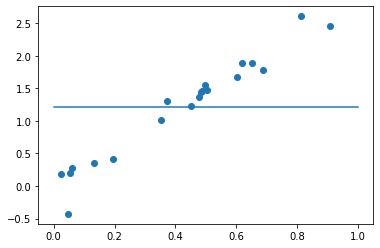

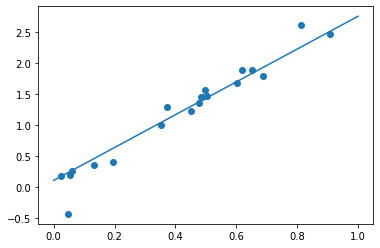

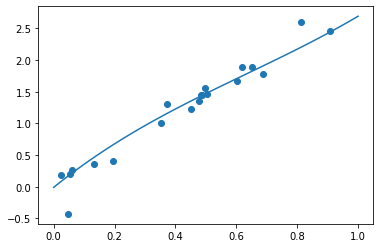

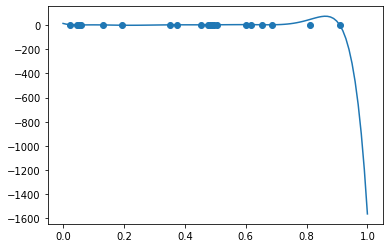

In [102]:
xnew=np.linspace(0,1,100)
xnew=np.array(xnew)
xnew=xnew.reshape(-1,1)
x_trans0=polynomial0.fit_transform(xnew)
y0=model0.predict(x_trans0)
plt.scatter(x,y)
plt.plot(xnew,y0)
plt.show()


x_trans1=polynomial1.fit_transform(xnew)
y1=model1.predict(x_trans1)
plt.scatter(x,y)
plt.plot(xnew,y1)
plt.show()

x_trans3=polynomial3.fit_transform(xnew)
y3=model3.predict(x_trans3)
plt.scatter(x,y)
plt.plot(xnew,y3)
plt.show()

x_trans9=polynomial9.fit_transform(xnew)
y9=model9.predict(x_trans9)
plt.scatter(x,y)
plt.plot(xnew,y9)
plt.show()


In [109]:
train_errors=[]
test_errors=[]
degree=[0,1,2,3,4,5,6,7,8,9]
for i in range(10):
  polynomial_features = PolynomialFeatures(degree = i)
  x_transf=polynomial_features.fit_transform(train_x)
  model=LinearRegression()
  score1=model.fit(x_transf,train_y)
  y_pred=model.predict(test_x)

  train_errors.append(score1.score(train_x,train_y))

print(train_errors)




ValueError: ignored